# Large Language Model (LLM) Text Analysis
**Student Name:** Ashraful Islam Tanzil  
**ID:** 0112230028

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 5)

c:\Users\Tanzil\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
print('Loading sentiment analysis model...')
sentiment_pipeline = pipeline(
    'sentiment-analysis',
    model='distilbert-base-uncased-finetuned-sst-2-english'
)

sample_texts = [
    'I love learning Machine Learning! It\'s amazing.',
    'My country is Bangladesh.',
    'Dhaka is a city of crowd and culture.',
    'My CGPA is very low.',
    'Shatarkul is densely populated place.'
]

print('Sentiment Analysis Results:')
print('-' * 60)

results = []
for text in sample_texts:
    result = sentiment_pipeline(text)[0]
    results.append(result)
    print(f'Text: {text}')
    print(f'  → Label: {result["label"]}, Score: {result["score"]:.4f}\n')

Loading sentiment analysis model...


Loading weights: 100%|██████████| 104/104 [00:00<00:00, 261.11it/s, Materializing param=pre_classifier.weight]                                  


Sentiment Analysis Results:
------------------------------------------------------------
Text: I love learning Machine Learning! It's amazing.
  → Label: POSITIVE, Score: 0.9999

Text: My country is Bangladesh.
  → Label: POSITIVE, Score: 0.9894

Text: Dhaka is a city of crowd and culture.
  → Label: POSITIVE, Score: 0.9996

Text: My CGPA is very low.
  → Label: NEGATIVE, Score: 0.9996

Text: Shatarkul is densely populated place.
  → Label: POSITIVE, Score: 0.7910



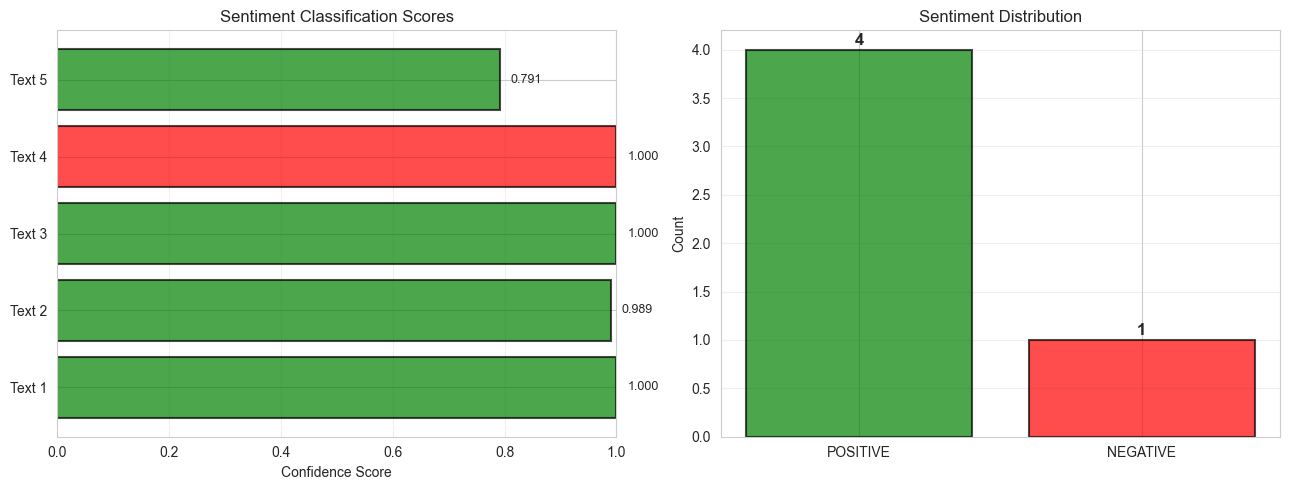

In [5]:
labels_llm = [r['label'] for r in results]
scores_llm = [r['score'] for r in results]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

colors_llm = ['green' if label == 'POSITIVE' else 'red' for label in labels_llm]
ax1.barh(range(len(sample_texts)), scores_llm, color=colors_llm, alpha=0.7, edgecolor='black', linewidth=1.5)
ax1.set_yticks(range(len(sample_texts)))
ax1.set_yticklabels([f'Text {i+1}' for i in range(len(sample_texts))], fontsize=10)
ax1.set_xlabel('Confidence Score')
ax1.set_title('Sentiment Classification Scores')
ax1.set_xlim([0, 1])
ax1.grid(alpha=0.3, axis='x')

for i, (label, score) in enumerate(zip(labels_llm, scores_llm)):
    ax1.text(score + 0.02, i, f'{score:.3f}', va='center', fontsize=9)

sentiment_counts = {}
for label in labels_llm:
    sentiment_counts[label] = sentiment_counts.get(label, 0) + 1

ax2.bar(sentiment_counts.keys(), sentiment_counts.values(),
        color=['green' if k == 'POSITIVE' else 'red' for k in sentiment_counts.keys()],
        alpha=0.7, edgecolor='black', linewidth=1.5)
ax2.set_ylabel('Count')
ax2.set_title('Sentiment Distribution')
ax2.grid(alpha=0.3, axis='y')

for i, (label, count) in enumerate(sentiment_counts.items()):
    ax2.text(i, count + 0.05, str(count), ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()